In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from itertools import combinations

In [2]:
data_path = '../data/' 

location_path = os.path.join(data_path, 'sdwpf_baidukddcup2022_turb_location.CSV')
location      = pd.read_csv(location_path)
location.describe()

,TurbID,x,y
count,134.000000,134.000000,134.000000
mean,67.500000,2666.760881,5986.126609
std,38.826537,1829.842484,3346.503906
min,1.000000,0.000000,0.000000
25%,34.250000,1014.935725,3182.294825
50%,67.500000,3246.541850,5841.894340
75%,100.750000,4320.609625,8814.832950
max,134.000000,5501.452900,12121.004260


In [3]:
turb_id = location['TurbID'].unique()
turb_id

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


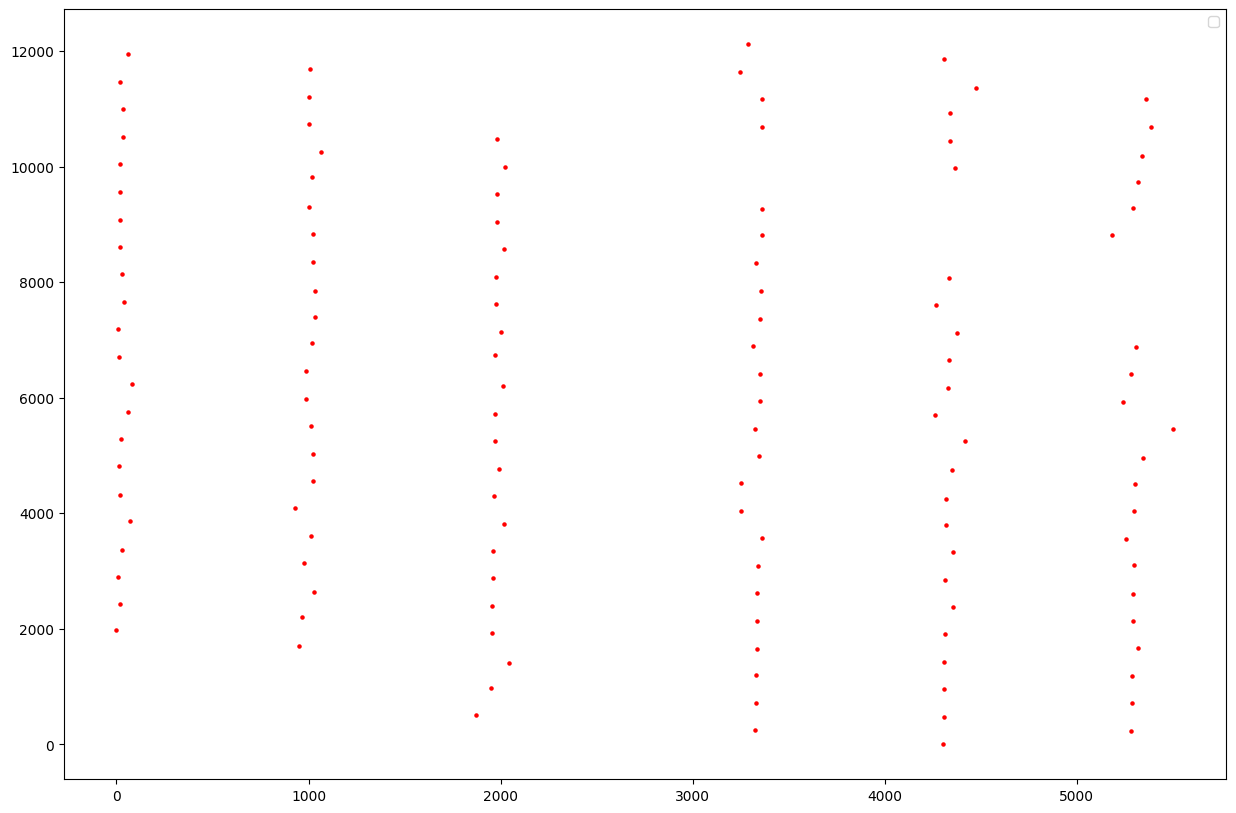

In [6]:
plt.figure(figsize=(15, 10))

plt.scatter(location['x'], location['y'], s=5, c='r')

plt.legend()
plt.show()

In [4]:
def binning(x):
    # 分箱
    if x < 800:
        return 0
    elif x < 1500:
        return 1
    elif x < 2500:
        return 2
    elif x < 3900:
        return 3
    elif x < 4900:
        return 4
    else:
        return 5
    
location['group_id'] = location['x'].apply(binning)
group_ids = location['group_id'].unique()
location

,TurbID,x,y,group_id
0,1,3349.8515,5939.23193,3
1,2,3351.0017,6416.64673,3
2,3,3314.7797,6892.18395,3
3,4,3352.0940,7366.14203,3
4,5,3355.3420,7841.20175,3
...,...,...,...,...
129,130,12.6509,4814.60040,0
130,131,23.3458,5284.65439,0
131,132,62.6774,5749.90633,0
132,133,78.4309,6231.32903,0


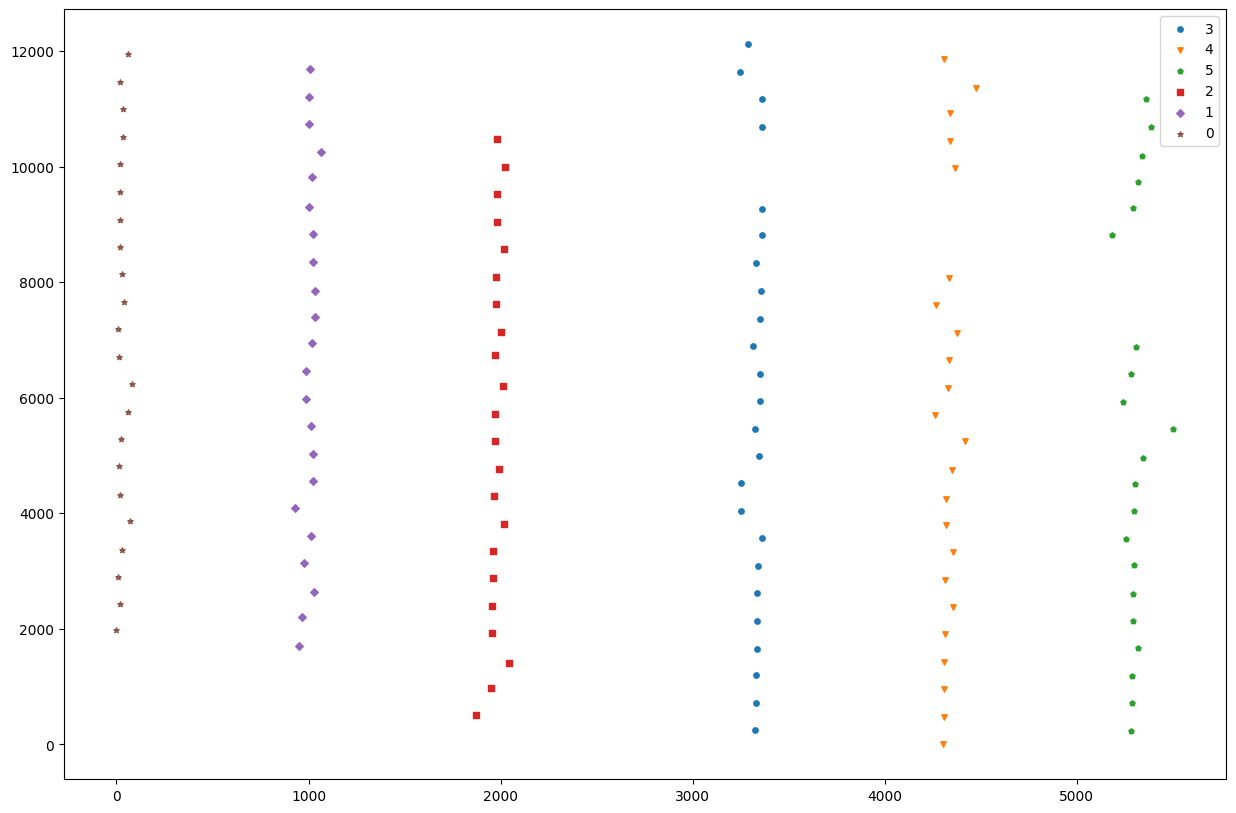

In [8]:
markers = ['o', 'v', 'p', 's', 'D', '*']
plt.figure(figsize=(15, 10))

for i, idx in enumerate(group_ids):
        plt.scatter(location[location['group_id'] == idx]['x'], location[location['group_id']==idx]['y'], s=15, marker=markers[i], label=idx)

plt.legend()
plt.show()


## 时序数据分析

In [3]:
df_train = pd.read_csv(os.path.join(data_path, 'wtbdata_245days.csv')) 
print(df_train.shape)
print(df_train.columns)
df_train.head()

(4727520, 13)
Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
      dtype='object')


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [4]:
df_train.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
count,4.727520e+06,4.727520e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06
mean,6.750000e+01,1.230000e+02,5.028376e+00,4.975428e-01,4.110668e+01,2.739717e+01,1.885826e+02,2.685400e+01,2.683916e+01,2.682679e+01,-1.323900e+01,3.504458e+02
std,3.868139e+01,7.072483e+01,3.393703e+00,3.160275e+01,8.529011e+01,1.832832e+01,1.632459e+02,3.883566e+01,3.882940e+01,3.882235e+01,7.044244e+01,4.249932e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,-9.330000e+00
25%,3.400000e+01,6.200000e+01,2.240000e+00,-3.830000e+00,1.405000e+01,2.006000e+01,6.302000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-3.861000e+01,-3.000000e-01
50%,6.750000e+01,1.230000e+02,4.340000e+00,-2.300000e-01,2.573000e+01,3.008000e+01,1.947900e+02,5.400000e-01,5.400000e-01,5.400000e-01,-3.000000e-01,1.790800e+02
75%,1.010000e+02,1.840000e+02,7.010000e+00,3.420000e+00,3.273000e+01,3.682000e+01,3.219600e+02,8.399000e+01,8.398000e+01,8.398000e+01,-3.000000e-02,5.476600e+02
max,1.340000e+02,2.450000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03


In [5]:
df_train.isnull().sum()

TurbID         0
Day            0
Tmstamp        0
Wspd       49518
Wdir       49518
Etmp       49518
Itmp       49518
Ndir       49518
Pab1       49518
Pab2       49518
Pab3       49518
Prtv       49518
Patv       49518
dtype: int64

## Fill the missings

In [12]:
df_train['Patv'].fillna(df_train.groupby('TurbID')['Patv'].transform('mean'), inplace=True)
num_missing = df_train['Patv'].isnull().sum()
print(f'Patv缺失值个数： {num_missing}')

Patv缺失值个数： 0


In [15]:
num_turbine = len(df_train['TurbID'].unique())
print(f'Number of turbines: {num_turbine}')
df_train['TurbID'].unique()

Number of turbines: 134


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134], dtype=int64)

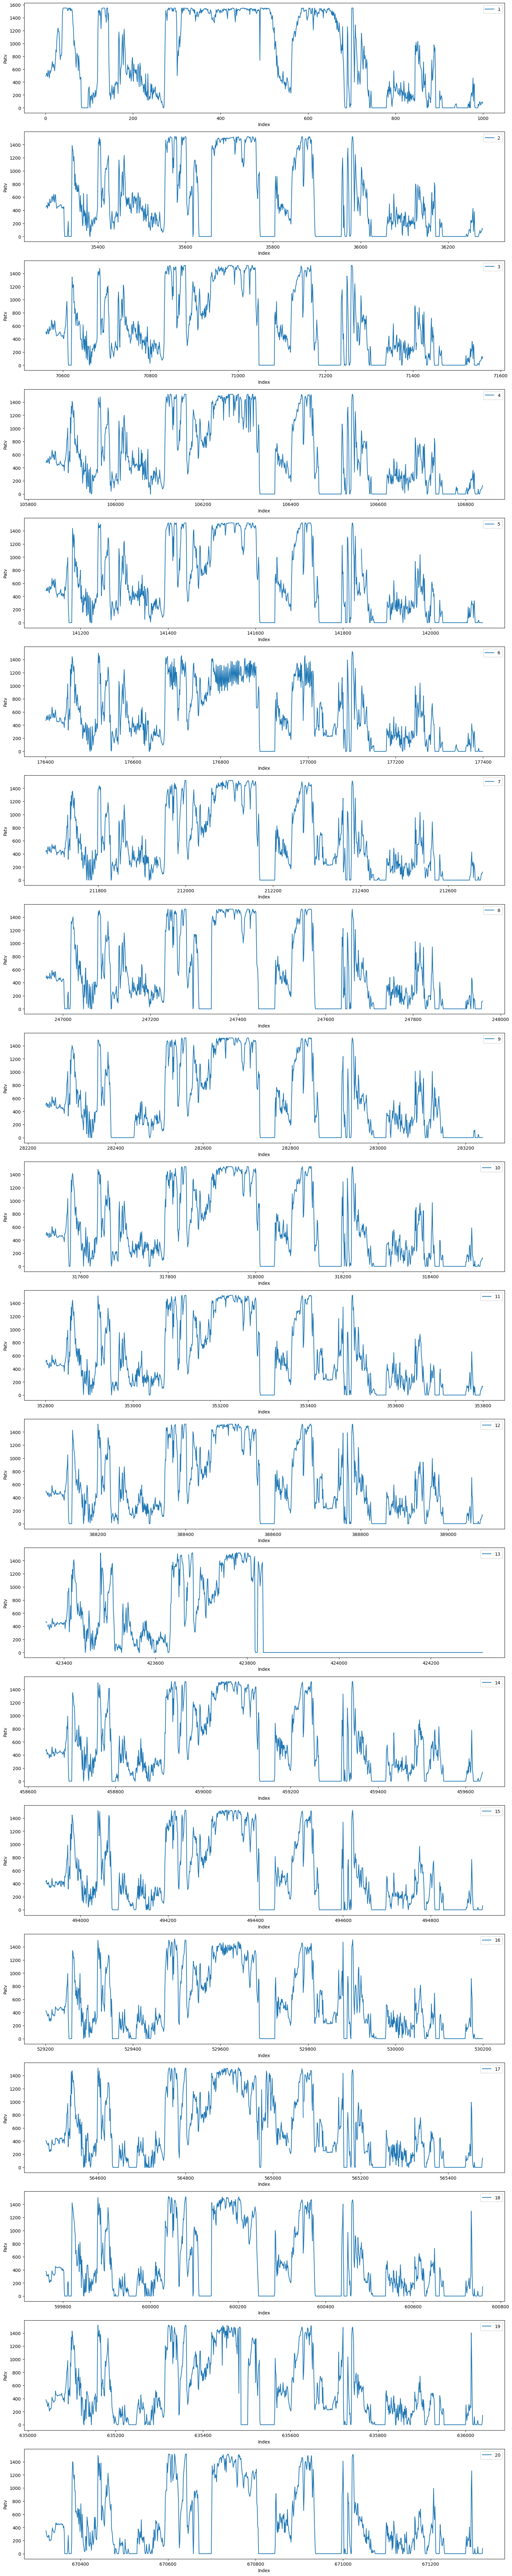

In [23]:
grouped_data = df_train.groupby('TurbID')
index_show = 1000
num_show = 20

fig, axes = plt.subplots(num_show, 1, figsize=(16, 4*num_show))

for i, (group_name, group_data) in enumerate(grouped_data):
    if i > num_show - 1:
        break
    else:
        ax = axes[i]
        ax.plot(group_data['Patv'][:index_show], label=group_name)
        ax.set_xlabel('Index')
        ax.set_ylabel('Patv')
        ax.legend()

plt.tight_layout()
plt.savefig(f'../images/Patv分TurbID展示_{num_show}.png', dpi=300)
plt.show()

## 时序相关分析

对于不同组别之间的时间序列数据，你可以使用一些统计方法和图形分析来判断它们之间是否存在相关性。以下是一些建议的方法：

1. **滞后相关性分析：**
   - 对于每个组别，计算目标变量时间序列在不同滞后（时间延迟）下的相关性。你可以使用滞后相关系数或交叉相关函数（CCF）来完成这项工作。观察滞后相关性的模式，看是否存在滞后关系。

2. **格兰杰因果检验：**
   - 对每一对组别进行格兰杰因果检验，以确定它们之间是否存在因果关系。这可以帮助你了解其中一个组别的变化是否可以预测另一个组别的变化。

3. **谱相关性分析：**
   - 对每个组别的目标变量进行谱相关性分析，检查在不同频率上的相关性模式。这可以揭示在不同时间尺度上两个组别之间的关联性。

4. **散点图和回归分析：**
   - 绘制散点图，将不同组别的目标变量时间序列进行比较。使用回归分析来量化两组时间序列之间的关系。

5. **协整关系分析：**
   - 考虑进行协整关系分析，以确定不同组别之间是否存在长期平衡关系。

6. **时间序列聚类：**
   - 对时间序列数据进行聚类分析，将相似的组别归为一类。聚类分析可以帮助你发现不同组别之间的共同模式。

7. **平稳性检验：**
   - 对每个组别的时间序列数据进行平稳性检验，确保数据在进行相关性分析之前是平稳的。

8. **Bootstrap方法：**
   - 使用Bootstrap方法对时间序列数据进行重抽样，以获得不同组别之间相关性的置信区间。

在实际应用中，你可能需要结合多个方法来得出更全面的结论。选择合适的方法时，请考虑数据的性质、问题的背景以及对于相关性的定义。

In [15]:


# 计算两两组别之间的时序相关性系数
group_combinations = list(combinations(df_train['TurbID'].unique(), 2))

correlation_results = pd.DataFrame(columns=['Group1', 'Group2', 'Correlation'])

for group1, group2 in group_combinations:
    subset1 = df_train[df_train['TurbID'] == group1]['Patv']
    subset2 = df_train[df_train['TurbID'] == group2]['Patv']
    
    correlation_coefficient = np.corrcoef(subset1, subset2)[0, 1]
    
    temp_df = pd.DataFrame({'Group1': [group1],
                            'Group2': [group2],
                            'Correlation': [correlation_coefficient]})

    correlation_results = pd.concat([correlation_results, temp_df], ignore_index=True)

# 补充下三角矩阵的数据
correlation_results_lower = correlation_results.copy()
correlation_results_lower['Group1'], correlation_results_lower['Group2'] = correlation_results['Group2'], correlation_results['Group1']
correlation_results = pd.concat([correlation_results, correlation_results_lower], ignore_index=True)

# 使用seaborn绘制热力图，将TurbID排序以提高可读性
correlation_matrix = correlation_results.pivot(index='Group1', columns='Group2', values='Correlation')
# 将对角线上的元素赋值为1
np.fill_diagonal(correlation_matrix.values, 1)
order = correlation_results['Group1'].unique()
correlation_matrix = correlation_matrix.loc[order, order]

correlation_matrix

Group2,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
Group1,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.792958,0.796782,0.788141,0.776865,0.808094,0.812235,0.785330,0.775233,0.785470,...,0.733520,0.703163,0.722690,0.703596,0.696547,0.693617,0.710352,0.688038,0.684519,0.683919
2,0.792958,1.000000,0.907134,0.918696,0.893923,0.922024,0.913045,0.897428,0.891420,0.909784,...,0.820836,0.787558,0.805471,0.803247,0.790905,0.795470,0.766038,0.757471,0.763380,0.796821
3,0.796782,0.907134,1.000000,0.909118,0.894550,0.924013,0.916575,0.889840,0.897563,0.911783,...,0.842347,0.782966,0.819871,0.818387,0.804177,0.808176,0.808683,0.774221,0.777432,0.805681
4,0.788141,0.918696,0.909118,1.000000,0.921719,0.934718,0.922208,0.895831,0.900761,0.912570,...,0.830118,0.768573,0.807916,0.804303,0.791911,0.795507,0.780607,0.769894,0.763192,0.794189
5,0.776865,0.893923,0.894550,0.921719,1.000000,0.926350,0.911326,0.883370,0.890687,0.904298,...,0.819941,0.759375,0.800379,0.796315,0.794307,0.784899,0.775079,0.750841,0.764070,0.797418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.693617,0.795470,0.808176,0.795507,0.784899,0.822530,0.826966,0.816414,0.821800,0.843879,...,0.925983,0.867126,0.921246,0.935658,0.940141,1.000000,0.916993,0.917441,0.908671,0.916023
131,0.710352,0.766038,0.808683,0.780607,0.775079,0.806775,0.815750,0.802885,0.806548,0.831263,...,0.917809,0.858545,0.903375,0.916905,0.919445,0.916993,1.000000,0.895247,0.896639,0.904986
132,0.688038,0.757471,0.774221,0.769894,0.750841,0.785816,0.795921,0.790716,0.784231,0.811258,...,0.893931,0.839614,0.885696,0.899181,0.897944,0.917441,0.895247,1.000000,0.888370,0.898235


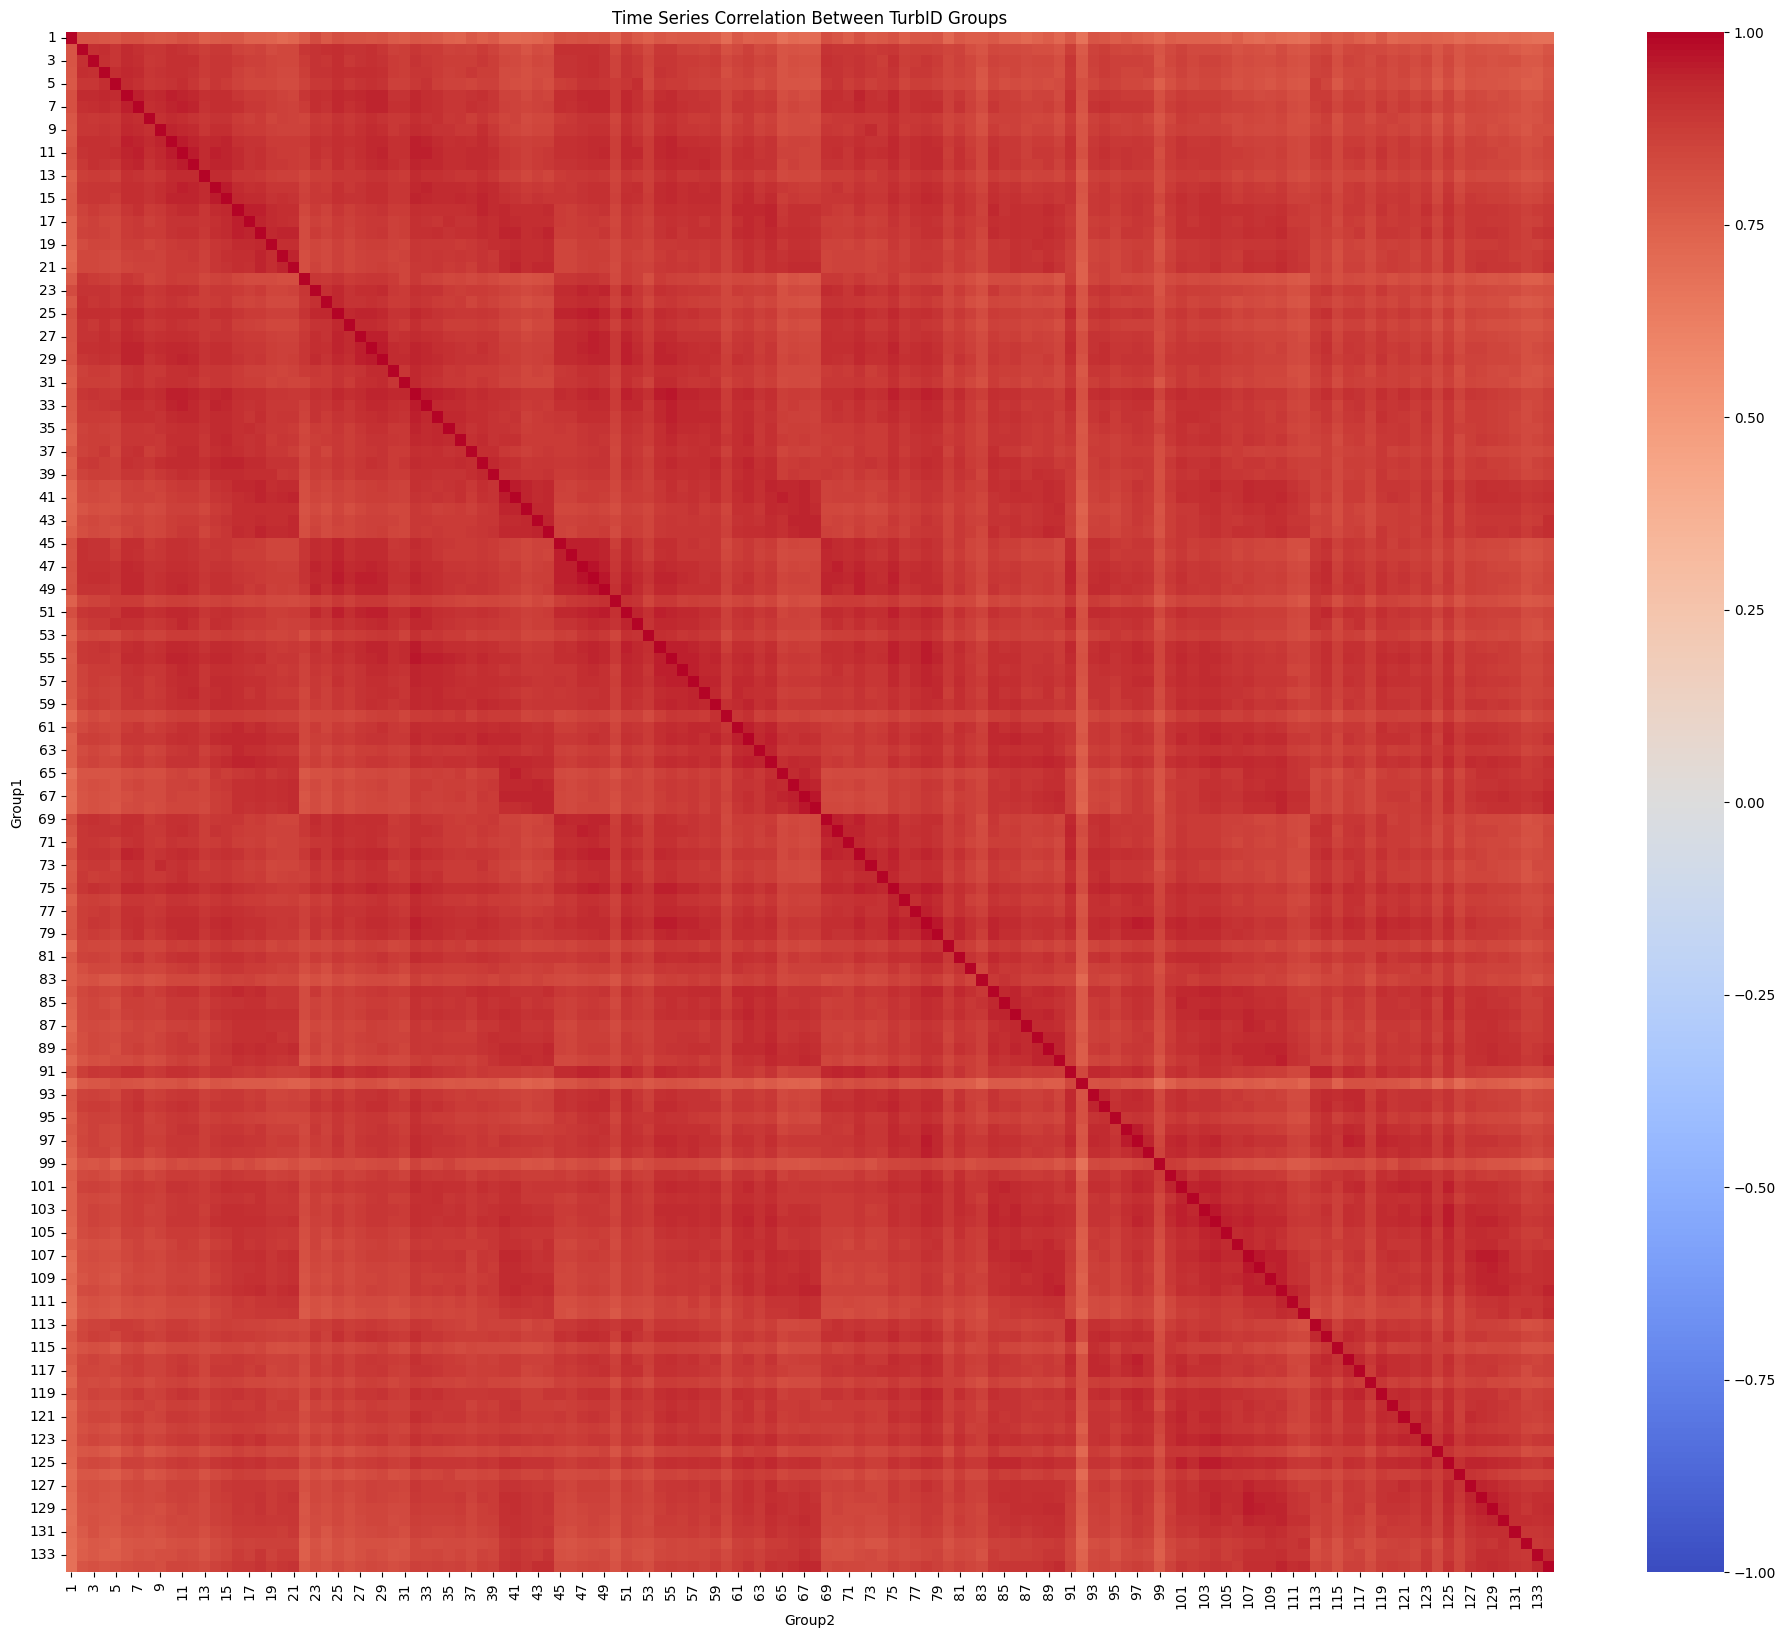

In [17]:
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Time Series Correlation Between TurbID Groups')
plt.show()

In [24]:
df_train = df_train.merge(location[['TurbID', 'group_id']], on='TurbID', how='left')
df_train.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,group_id
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,3
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,3
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,3
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,3


In [52]:
df_group_describe = df_train.groupby('group_id')['Patv'].describe()
df_group_describe = df_group_describe.rename_axis(columns=None).reset_index()
df_group_describe

,group_id,count,mean,std,min,25%,50%,75%,max
0,0,776160.0,321.682718,394.448801,-8.45,-0.3,168.980,488.2200,1523.20
1,1,776160.0,313.915527,390.913499,-9.31,-0.3,160.030,475.2200,1559.84
2,2,776160.0,347.048101,420.747861,-8.55,-0.3,180.970,532.8525,1560.93
3,3,846720.0,395.084039,459.264208,-8.56,-0.3,213.925,633.8325,1552.76
4,4,811440.0,369.246386,436.730645,-9.33,-0.3,198.750,577.3600,1567.02
5,5,740880.0,350.710860,420.827505,-8.35,-0.3,187.475,537.9100,1561.00


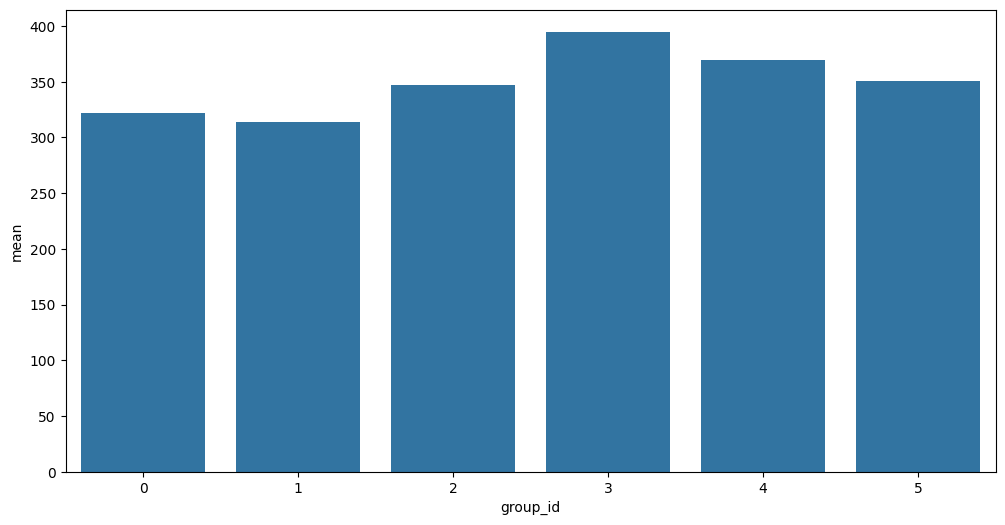

In [ ]:
plt.figure(figsize=(12, 6))
# sns.displot(data=df_group_describe, x='mean', hue='group_id', kind='hist')
sns.barplot(data=df_group_describe, x='group_id', y='mean')

# plt.bar(df_group_describe['group_id'], df_group_describe['mean'])
plt.show()

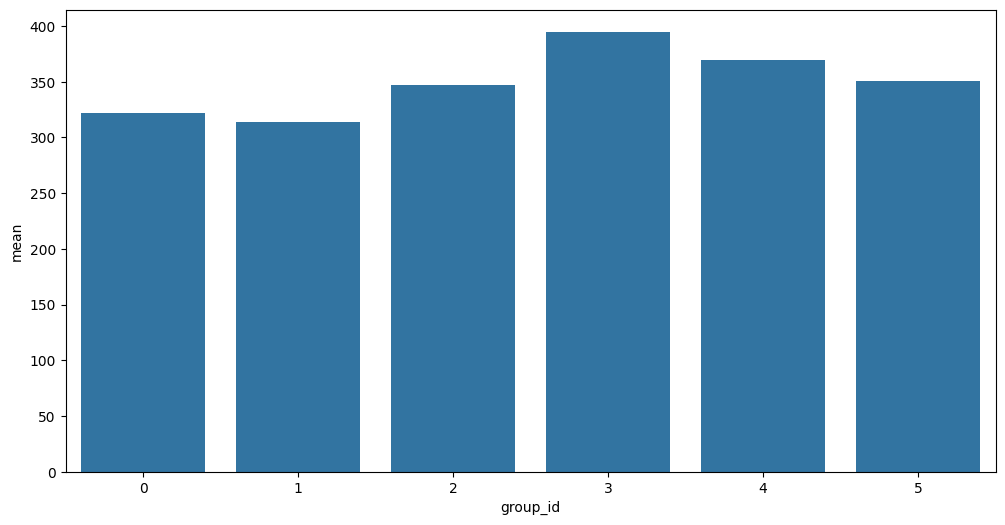

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df_group_describe, x='group_id', y='mean')

# plt.bar(df_group_describe['group_id'], df_group_describe['mean'])
plt.show()

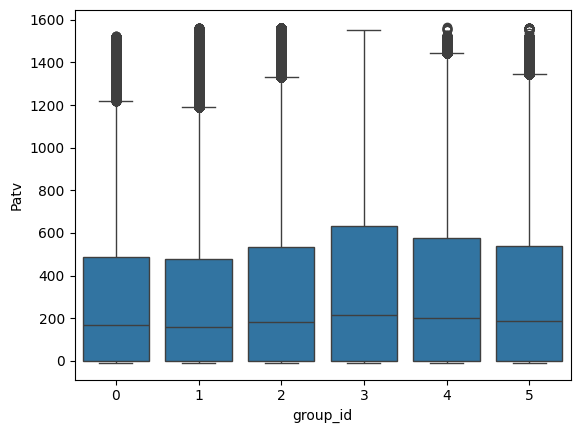

In [44]:
sns.boxplot(data=df_train, x='group_id', y='Patv')
plt.show()

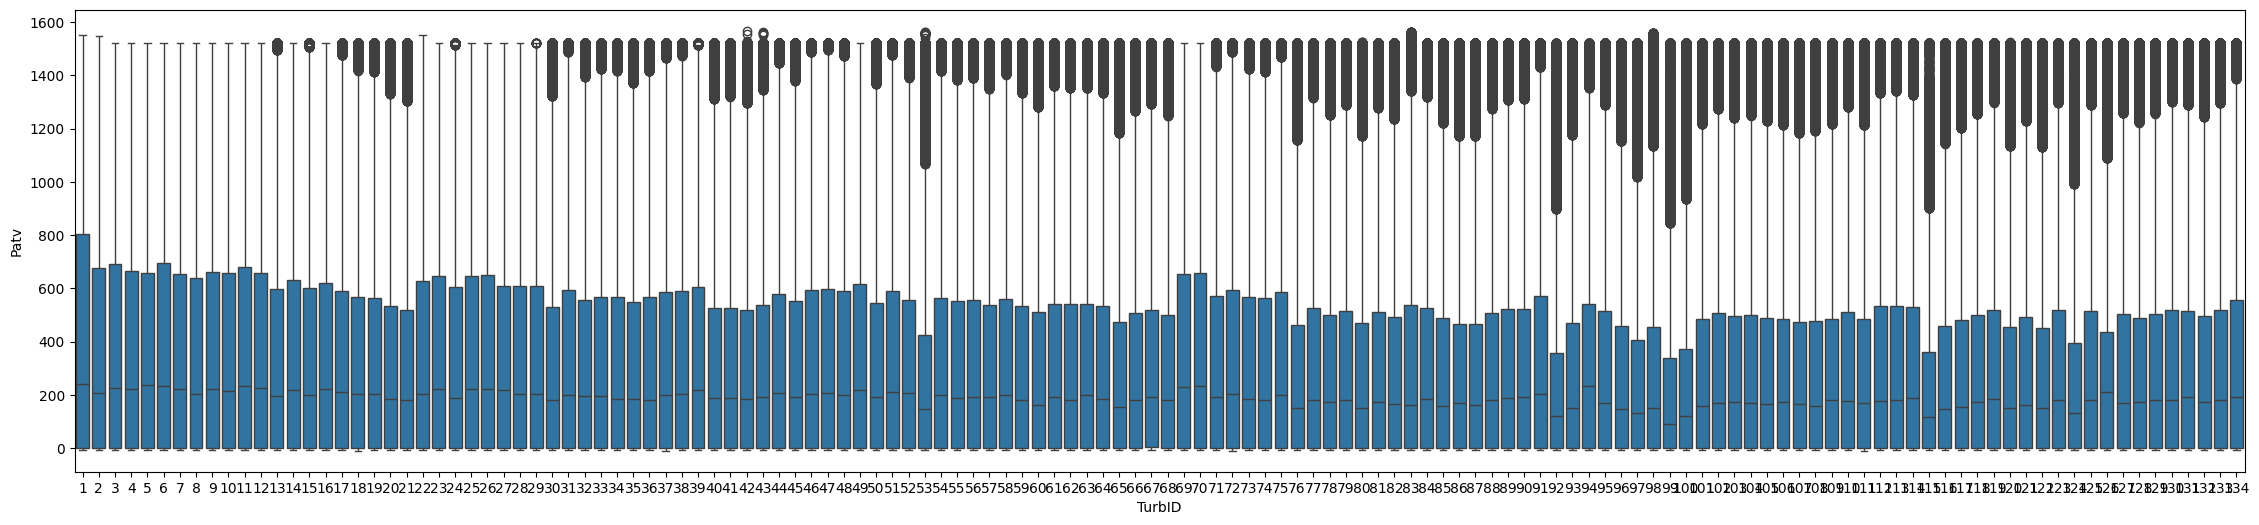

In [81]:
plt.figure(figsize=(28, 6))
sns.boxplot(data=df_train, x='TurbID', y='Patv')
plt.show()

## ANOVA

分析不同组别或ID的风机功率是否有显著差异。

[【知乎】方差分析](https://zhuanlan.zhihu.com/p/358628175)

### Statsmodel

In [66]:
groups = [df_train[df_train['group_id'] == i]['Patv'] for i in df_train['group_id'].unique()]
len(groups)

Patv缺失值个数： 0


6

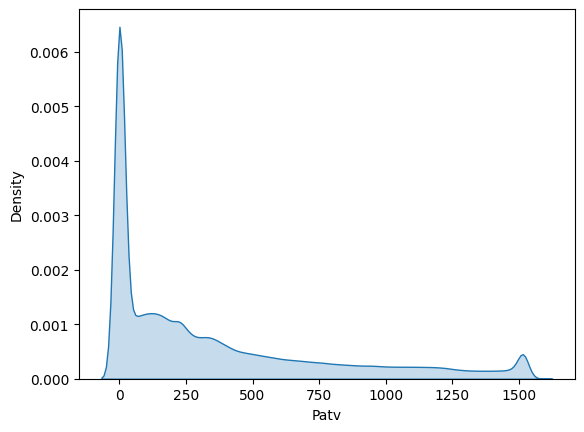

In [83]:
sns.kdeplot(data=df_train, x='Patv', fill=True)
plt.show()

In [69]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

# 假设 df 是包含组别（group_id）和目标变量（Patv）的DataFrame

# First, check if the variances are equal, with the "Levene"-test
(W, p) = stats.levene(*groups)
if p < 0.05:
    print(f'Warning: the p-value of the Levene test is <0.05: p={p:.2e}')
else:
    print(f'The p_value of the Levene test is {p:.2e}. Variances is approximally equal.')

# 创建一个OLS模型（普通最小二乘）
model = ols('Patv ~ group_id', data=df_train).fit()

# 执行方差分析
anova_table = sm.stats.anova_lm(model)

# 打印方差分析结果
print(anova_table)

                 df        sum_sq       mean_sq            F  PR(>F)
group_id        1.0  1.496726e+09  1.496726e+09  8388.569508     0.0
Residual  4727518.0  8.435048e+11  1.784245e+05          NaN     NaN


注意，方差分析的前提条件方差齐性都没有满足，这个ANOVA的结果不可靠。


### Scipy

In [74]:
from scipy.stats import f_oneway

# 执行单因素方差分析
f_statistic, p_value = f_oneway(*groups)

# 打印方差分析结果
print("F 统计量:", f_statistic)
print(f"p 值: {p_value:.2e}")

F 统计量: 4114.091611863526
p 值: 0.00e+00


## Kruskal-Wallis检验

### Deepseek
Kruskal-Wallis H检验是一种非参数检验方法，用于比较多个独立样本的中位数是否相等。Kruskal-Wallis H检验不需要满足正态性和方差齐性的前提条件，因此适用于小样本量或非正态分布的数据。

Kruskal-Wallis H检验的基本思想是，将所有样本的观测值按照大小排序，然后计算每个样本的中位数和秩次，最后使用H统计量来检验多个样本的中位数是否相等。

Kruskal-Wallis H检验对数据的要求如下：

1. 每个样本必须是独立的，即样本之间没有相关性。

2. 每个样本的观测值必须是连续的，即不能有缺失值或离群值。

3. 每个样本的观测值可以是任何分布，不需要满足正态性。

需要注意的是，Kruskal-Wallis H检验只能检验多个样本的中位数是否相等，不能检验多个样本的均值是否相等。如果需要检验多个样本的均值是否相等，可以使用方差分析等方法。

### ChatGPT
Kruskal-Wallis检验是一种非参数检验方法，用于比较两个或多个独立组别的中位数是否相同。它是方差分析（ANOVA）的非参数等价方法，适用于因变量为有序类别或数值型，而且不满足正态分布假设的情况。这种方法可以用于替代ANOVA，特别是在数据不满足正态分布或方差齐性的情况下。

Kruskal-Wallis检验的基本思想是将所有的数据合并在一起，然后根据组别对数据进行排名。接着，计算每个组别的排名和，通过比较排名和来判断不同组别之间是否存在显著差异。

关于数据的要求：

1. **独立性：** 观测值在不同组别之间应该是独立的。

2. **测量水平：** 因变量可以是有序的类别数据或数值型数据。

3. **独立样本：** 不同组别的样本应该是独立的。

4. **方差齐性：** Kruskal-Wallis检验对方差不齐性不敏感，因此即使不同组别的方差不相等，也可以使用该检验。

5. **随机抽样：** 数据应该是随机抽样的，以确保结果的推广性。

需要注意的是，Kruskal-Wallis检验是一种用于总体差异的检验方法，如果检验结果表明组别之间存在显著差异，进一步的分析可能需要使用其他方法来确定具体哪些组别存在差异。

### Scipy
[Scipy documentation](https://docs.scipy.org/doc//scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)

In [77]:
import pandas as pd
from scipy.stats import kruskal


# 进行Kruskal-Wallis检验
statistic, pvalue = kruskal(df_train['Patv'], df_train['group_id'])

# 输出结果
print('Kruskal-Wallis statistic:', statistic)
print(f'p-value: {pvalue:.2e}')

Kruskal-Wallis statistic: 1227642.0249889465
p-value: 0.00e+00


说明不同组之间的差异是显著的，不同组的样本是相互独立的。另，这个组别是根据地理位置的x坐标划分的，说明不同地理位置上的风机功率差异显著。

Kruskal-Wallis检验结果的p值为0.00e+00，说明在显著性水平为0.05的情况下，不同组别对功率的影响是显著的。

这可能是因为不同组别的位置、风速、风向等因素存在差异，导致功率输出存在差异。因此，可以认为风机的地理位置对风机的风电功率影响显著。

In [78]:
# 进行Kruskal-Wallis检验
statistic, pvalue = kruskal(df_train['Patv'], df_train['TurbID'])

# 输出结果
print('Kruskal-Wallis statistic:', statistic)
print(f'p-value: {pvalue:.2e}')

Kruskal-Wallis statistic: 522146.5349722441
p-value: 0.00e+00


p值为0.00e+00表示在显著性水平为0.05的情况下，风机ID对功率的影响是显著的，即不同风机ID的功率输出存在显著差异。这可能是因为不同风机ID的风机性能、风速、风向等因素存在差异，导致功率输出存在差异。

根据您提供的信息，Kruskal-Wallis检验结果的p值为0.00e+00，说明在显著性水平为0.05的情况下，不同组别对功率的影响是显著的。这可能是因为不同组别的位置、风速、风向等因素存在差异，导致功率输出存在差异。因此，可以认为不同地理位置的风机的功率存在显著差异。

对于GNN模型，它是一种基于图神经网络的模型，可以对整个风电场的所有风机进行统一建模。GNN模型可以考虑风机之间的空间关系和拓扑结构，从而更好地捕捉风机之间的相互作用和影响。因此，即使不同地理位置的风机的功率存在显著差异，也可以使用GNN模型进行统一建模。

需要注意的是，在使用GNN模型进行统一建模时，需要考虑不同地理位置的风机之间的空间关系和拓扑结构，以及风速、风向等因素对风机功率的影响。同时，还需要对模型进行适当的训练和调参，以提高模型的预测精度和泛化能力。


从空气动力学角度来看，距离相近的风机之间确实会存在相互影响。当两台风机距离较近时，它们之间的气流会相互干扰，导致风机的风速和风向发生变化，从而影响风机的功率输出。这种现象被称为“尾流效应”。

尾流效应会导致风机的功率输出降低，同时也会影响风机的寿命和可靠性。因此，在风电场的设计和布局中，需要考虑风机之间的距离和空间关系，以减少尾流效应的影响。

需要注意的是，尾流效应的影响程度与风机的距离、风速、风向等因素有关。在实际应用中，需要根据具体情况进行分析和评估，以确定最佳的风机布局和间距。